<a href="https://colab.research.google.com/github/fairyjihyun/competition/blob/main/DACON/%EC%B6%95%EA%B5%AC%EC%84%A0%EC%88%98%EC%9C%A0%EB%A7%9D%EC%97%AC%EB%B6%80%EC%98%88%EC%B8%A1AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import random
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier

## 경고 무시
import warnings
warnings.filterwarnings('ignore')

## 결과확인을 용이하게 하는 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 변수 고정
class CFG:
    user_seed = 42
    target = 'Prospect'

In [ ]:
# seed 고정
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(CFG.user_seed)

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/DACON/축구선수의 유망 여부 예측 AI/open/'

In [ ]:
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

## EDA

In [ ]:
print('Shape:', train.shape, '\n')
print(train.columns, '\n')
train.head()

Shape: (3019, 66) 

Index(['ID', 'Age', 'Height', 'Weight', 'Position', 'PreferredFoot',
       'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal', 'ShootingTotal',
       'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'STRating',
       'LWRating', 'LFRating', 'CFRating', 'RFRating', 'RWRating', 'CAMRating',
       'LMRating', 'CMRating', 'RMRating', 'LWBRating', 'CDMRating',
       'RWBRating', 'LBRating', 'CBRating', 'RBRating', 'GKRating',
       'Prospe

,ID,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,...,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,Prospect
0,TRAIN_0000,21,182,82,CB,Right,Medium,Medium,4.6377,2.1053,...,4.9315,4.8649,6.1972,6.0000,6.1972,6.4286,6.5278,6.4286,0.875,0
1,TRAIN_0001,21,160,75,ST,Left,High,Medium,7.3913,7.3684,...,5.8904,6.4865,5.2113,4.4286,5.2113,5.0000,4.1667,5.0000,1.250,0
2,TRAIN_0002,18,165,60,RB,Right,Medium,Medium,6.2319,3.2895,...,4.9315,5.2703,5.7746,5.1429,5.7746,5.8571,5.0000,5.8571,0.750,0
3,TRAIN_0003,20,190,72,CB,Right,Medium,Medium,4.7826,1.0526,...,2.3288,2.2973,4.0845,3.7143,4.0845,4.5714,4.5833,4.5714,0.875,0
4,TRAIN_0004,21,181,77,ST,Right,High,Medium,8.2609,7.3684,...,6.3014,7.5676,5.2113,4.2857,5.2113,4.7143,3.3333,4.7143,1.125,0


In [ ]:
# 결측치 및 데이터 타입 확인
print('결측치 합계: ', train.isna().sum().sum(), '\n')
train.info()

결측치 합계:  0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3019 non-null   object 
 1   Age                3019 non-null   int64  
 2   Height             3019 non-null   int64  
 3   Weight             3019 non-null   int64  
 4   Position           3019 non-null   object 
 5   PreferredFoot      3019 non-null   object 
 6   AttackingWorkRate  3019 non-null   object 
 7   DefensiveWorkRate  3019 non-null   object 
 8   PaceTotal          3019 non-null   float64
 9   ShootingTotal      3019 non-null   float64
 10  PassingTotal       3019 non-null   float64
 11  DribblingTotal     3019 non-null   float64
 12  DefendingTotal     3019 non-null   float64
 13  PhysicalityTotal   3019 non-null   float64
 14  Crossing           3019 non-null   float64
 15  Finishing          3019 non-null   float64
 16  HeadingAccu

In [ ]:
# 중복값 확인
print('중복값 합계: ', sum(train.duplicated()))

중복값 합계:  0


In [ ]:
# 숫자 자료형
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3019.0,19.632329,1.235638,16.0000,19.0000,20.0000,21.0000,21.0000
Height,3019.0,180.892348,6.800187,160.0000,176.0000,180.0000,185.5000,204.0000
Weight,3019.0,73.081153,6.539758,49.0000,69.0000,73.0000,77.0000,99.0000
PaceTotal,3019.0,5.760521,1.298024,0.7246,4.9275,5.7971,6.6667,9.7101
ShootingTotal,3019.0,4.292595,1.624982,0.5263,3.0921,4.6053,5.5263,9.8684
...,...,...,...,...,...,...,...,...
LBRating,3019.0,4.852789,1.877633,0.0000,4.0000,5.2857,6.1429,9.1429
CBRating,3019.0,4.330720,1.880760,0.0000,3.0556,4.5833,5.8333,9.0278
RBRating,3019.0,4.852789,1.877633,0.0000,4.0000,5.2857,6.1429,9.1429
GKRating,3019.0,1.424188,1.606925,0.2500,0.7500,0.8750,1.1250,8.6250


In [ ]:
# 숫자 이외의 자료형
train.describe(include='object').T

,count,unique,top,freq
ID,3019,3019,TRAIN_0000,1
Position,3019,15,CAM,612
PreferredFoot,3019,2,Right,2284
AttackingWorkRate,3019,3,Medium,2188
DefensiveWorkRate,3019,3,Medium,2515


In [ ]:
# 숫자 이외의 자료형의 값 및 개수 확인
for col in ['Position','PreferredFoot','AttackingWorkRate','DefensiveWorkRate']:
  print(col)
  print(train[col].value_counts())

Position
CAM    612
CB     534
ST     446
GK     314
RM     292
CDM    144
RB     139
LM     134
CM     129
LB     118
RWB     61
LWB     56
RW      20
LW      18
CF       2
Name: Position, dtype: int64
PreferredFoot
Right    2284
Left      735
Name: PreferredFoot, dtype: int64
AttackingWorkRate
Medium    2188
High       736
Low         95
Name: AttackingWorkRate, dtype: int64
DefensiveWorkRate
Medium    2515
High       302
Low        202
Name: DefensiveWorkRate, dtype: int64


In [ ]:
# target 변수 분포 확인
train['Prospect'].value_counts()

0    1929
1    1090
Name: Prospect, dtype: int64

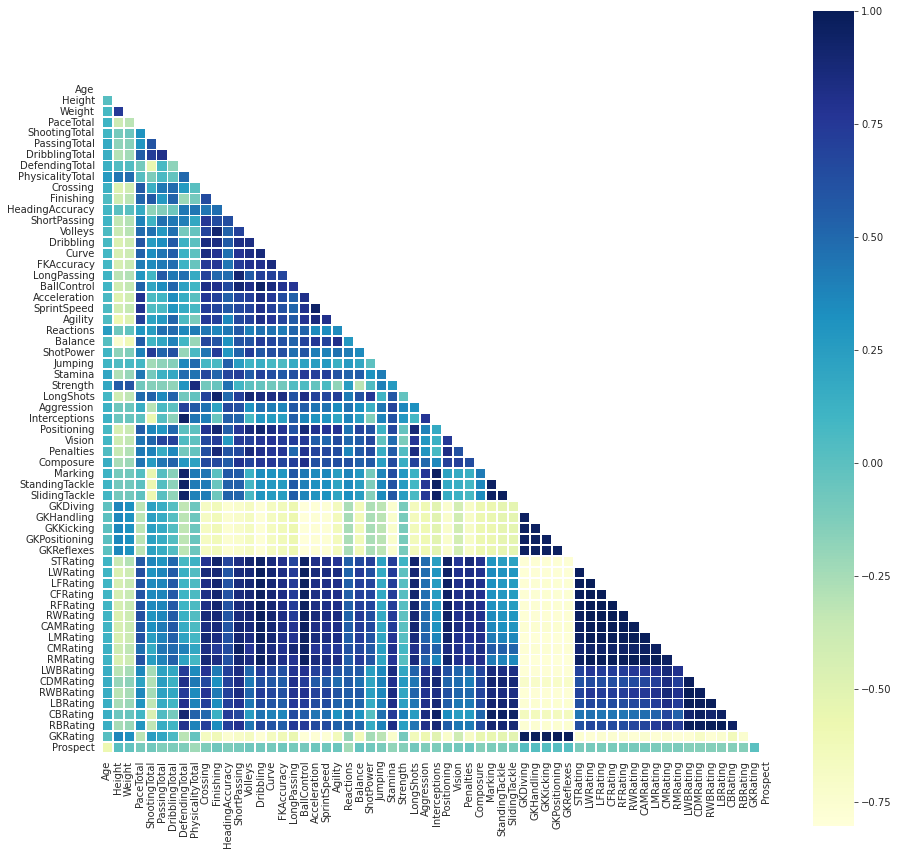

In [ ]:
corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

## Data preprocessing

In [ ]:
# label encoding
qual_cols = ['PreferredFoot', 'AttackingWorkRate', 'DefensiveWorkRate']

for i in qual_cols:
    le = LabelEncoder()
    le = le.fit(train[i])
    
    train[i] = le.transform(train[i])
    
    for label in np.unique(test[i]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    ## Label Encoder가 Test 데이터로부터 Fitting되는 것은 Data Leakage이므로, Test 데이터에는 Train 데이터로 Fitting된 Label Encoder로부터 transform만 수행되어야 합니다.
    test[i] = le.transform(test[i])
print('Done.')

Done.


In [ ]:
# one-hot encoding
qual_col = ['Position']
one_hot_encoder = {}
for i in qual_col:
  cols = set(list(train[i]))
  for fname in cols:
    train[fname] = (train[i]==fname)
    test[fname] = (test[i]==fname)
  train = train.drop(columns=i)
  test = test.drop(columns=i)
print('Done.')

Done.


## Modeling

In [ ]:
X = train.drop(['ID', CFG.target], axis=1)
y = train[CFG.target]

### Train / Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print('length of X_train / x_valid:', len(X_train),'/', len(X_valid))
print('length of y_train / y_valid:', len(y_train),'/', len(y_valid))

length of X_train / x_valid: 2415 / 604
length of y_train / y_valid: 2415 / 604


In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_valid = scaler.transform(X_valid)

## Classification model fit


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [ ]:
model1 = RandomForestClassifier(random_state = CFG.user_seed)
model2 = XGBClassifier(random_state = CFG.user_seed)
model3 = LGBMClassifier(random_state = CFG.user_seed, n_estimators=1000, reg_lambda=1)
model4 = CatBoostClassifier(random_state = CFG.user_seed, verbose=False)

In [ ]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

XGBClassifier(random_state=42)

LGBMClassifier(n_estimators=1000, random_state=42, reg_lambda=1)

In [ ]:
# RF
y_pred = model1.predict(X_valid)

print('macro f1-score:', metrics.f1_score(y_valid, y_pred, average='macro'))
print(metrics.classification_report(y_valid, y_pred))

macro f1-score: 0.7327568770226537
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       386
           1       0.73      0.56      0.64       218

    accuracy                           0.77       604
   macro avg       0.76      0.72      0.73       604
weighted avg       0.76      0.77      0.76       604



In [ ]:
# XGB
y_pred = model2.predict(X_valid)

print('macro f1-score:', metrics.f1_score(y_valid, y_pred, average='macro'))
print(metrics.classification_report(y_valid, y_pred))

macro f1-score: 0.7535881131386749
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       386
           1       0.72      0.63      0.67       218

    accuracy                           0.78       604
   macro avg       0.76      0.75      0.75       604
weighted avg       0.78      0.78      0.78       604



In [ ]:
# LGBM
y_pred = model3.predict(X_valid)

print('macro f1-score:', metrics.f1_score(y_valid, y_pred, average='macro'))
print(metrics.classification_report(y_valid, y_pred))

macro f1-score: 0.740449252497934
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       386
           1       0.68      0.65      0.66       218

    accuracy                           0.76       604
   macro avg       0.74      0.74      0.74       604
weighted avg       0.76      0.76      0.76       604



In [ ]:
# Catboost
y_pred = model4.predict(X_valid)

print('macro f1-score:', metrics.f1_score(y_valid, y_pred, average='macro'))
print(metrics.classification_report(y_valid, y_pred))

macro f1-score: 0.7442947773070422
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       386
           1       0.72      0.61      0.66       218

    accuracy                           0.77       604
   macro avg       0.76      0.74      0.74       604
weighted avg       0.77      0.77      0.77       604



현재 파일 점수
- RF : 0.7407
- XGB : 0.7535
- LGBM : 0.7404
- Cat : 0.7442

## Inference

In [ ]:
X_test = test.drop(['ID'], axis=1)

## pred
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)

pred = (pred1 + pred2 + pred3 + pred4)/4

In [ ]:
submit = pd.read_csv(path + 'sample_submission.csv')

In [ ]:
submit[CFG.target] = pred

In [ ]:
# Voting ensemble
submit['Prospect'] = submit['Prospect'].apply(lambda x: 0 if x < 0.5 else 1)

In [ ]:
submit

,ID,Prospect
0,TEST_0000,1
1,TEST_0001,1
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,1
...,...,...
1621,TEST_1621,0
1622,TEST_1622,0
1623,TEST_1623,0
1624,TEST_1624,1


In [ ]:
submit.to_csv(path + 'submit(10).csv', index = False)